> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

   # Project: Investigate IMDB's Movies Dataset from 1960 to 2015 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 In this report, we are going to explore a dataset taken from IMDB's database which contains information of more than 10,000 movies dating from 1960 up to 2015. More specifically, by applying data wrangling, analyzing and visualizing techniques learnt from Udacity to raw data in the tmdb-movies.csv file, we will be able to answer the following questions:

1. Which movie genres tend to generate the most ( and the least ) average revenue in each decade, starting from 1960 to 2015 ?

2. Which production companies have the largest total revenue from 1960 to 2015 ?

3. Does it cost more to make a movie in 2015 than in the 1960s, 1970s or even 2000s, with inflation being taken into consideration ?

4. What are the most profitable movies being made during each decade, starting from 1960 to 2015 ?

5. Who are the most successful actors / actresses measured by having the largest total revenue for the movies that they starred in ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('./tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check the number of rows and columns of our dataset
df.shape

(10866, 21)

- After applying info() method to our dataset, we can see that there are null values for columns that we are going to use in our analysis, which includes "cast", "production_companies" and "genres". This shall be addressed in later sections as we go deeper into our research.

In [4]:
# check if there are any null value in each of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# double-check that release year is indeed from 1960 to 2015
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

- Next, we will check for and remove duplicates in our dataset. Fortunately, it shows as below that there are none of them, therefore no further action is required in this step.

In [7]:
# check for duplicates if any
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10853    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Initial Data Cleaning

- In this section, we are going to performing the initial data cleaning process, specifically by removing a number of columns that are not relevant to answering our questions as well as deleting certain rows that do not meet our requirements ( more details below ). 


- Firstly, let's remove columns that we are not going to use in this research:

In [8]:
# Dropping columns that we no longer need in our report
df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'release_date', 'vote_count', 'vote_average'], axis = 1, inplace = True)
df.head()

,original_title,cast,director,genres,production_companies,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


- Now, let's do some data cleaning for question 1, question 2 and question 5, all of which shall follow a common step-by-step process except for several minor changes in variables' names.

#### Data cleaning for research question 1, question 2 and question 5:

In [9]:
df.query('budget_adj == 0')

,original_title,cast,director,genres,production_companies,release_year,budget_adj,revenue_adj
30,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015,0.0,2.700677e+07
36,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015,0.0,2.056620e+07
72,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,Thriller,Furthur Films,2015,0.0,4.222338e+04
74,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015,0.0,0.000000e+00
75,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,Comedy|Drama,Indian Paintbrush,2015,0.0,0.000000e+00
88,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,2015,0.0,1.839999e+06
92,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015,0.0,0.000000e+00
95,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,2015,0.0,2.150550e+08
100,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2015,0.0,0.000000e+00
101,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,2015,0.0,0.000000e+00


In [10]:
df.query('revenue_adj == 0')

,original_title,cast,director,genres,production_companies,release_year,budget_adj,revenue_adj
48,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015,2.759999e+07,0.0
67,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015,1.839999e+07,0.0
74,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015,0.000000e+00,0.0
75,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,Comedy|Drama,Indian Paintbrush,2015,0.000000e+00,0.0
92,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015,0.000000e+00,0.0
93,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,2015,9.199996e+06,0.0
100,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2015,0.000000e+00,0.0
101,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,2015,0.000000e+00,0.0
103,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,2015,0.000000e+00,0.0
116,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,Action|Fantasy|Adventure,Universal Pictures,2015,0.000000e+00,0.0



- In this report, we chose "revenue_adj" and "budget_adj" instead of the original "revenue" and "budget" as measure of comparison as they eliminate the impact of inflation over such a long period of time and therefore give much reliable and accurate statistics.


- After running the cells above, we noted that for a number of movies, the value for budget_adj and/or revenue_adj is 0.0. By common sense, we know that this is not possible as making a movie inevitably costs money, and no matter how unpopular the movie is it should at least generate some kind of revenue. Hence, we will assume "0.0" here means that the true budget_adj and revenue_adj amount have not been obtained, and a random number, which is zero in this case has been chosen to input in those cells with missing data.


- As we are exploring the correlation between movie genres, movie stars as well as production companies and their corresponding revenue in our research, the movies which display 0.0 in revenue_adj cells shall be removed as they can negatively impact the accuracy of our results.


- On a side note, we will keep the movies which show 0.0 for budget_adj and a valid number for revenue_adj cell, should there be any of them.


In [11]:
# Rows that contain 0.0 value for revenue_adj shall be excluded
df_01 = df.query('revenue_adj != 0')
df_01.describe()

,release_year,budget_adj,revenue_adj
count,4850.000000,4.850000e+03,4.850000e+03
mean,2000.921649,3.516102e+07,1.150774e+08
std,11.569192,4.375672e+07,1.988419e+08
min,1960.000000,0.000000e+00,2.370705e+00
25%,1994.000000,2.332078e+06,1.046262e+07
50%,2004.000000,2.032801e+07,4.392749e+07
75%,2010.000000,4.973516e+07,1.315644e+08
max,2015.000000,4.250000e+08,2.827124e+09


- As pointed out in General Properties section, "genres" column contains some rows with null values. Since we are trying to figure out which movies genres are associated with larger revenue, these shall be deleted from our dataset for the sake of accuracy.

In [12]:
# Rows that contain null value for genres shall be dropped
df_01.dropna(subset = ['genres'], inplace=True)

C:\Users\tuanh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- Next, only columns that are required to answer the first question shall be kept, with the rest being removed as they are no longer needed.

In [13]:
# Dropping irrelevant columns in our dataset
df_01.drop(['original_title', 'cast', 'director', 'production_companies'], axis =1, inplace = True)
df_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 4 columns):
genres          4850 non-null object
release_year    4850 non-null int64
budget_adj      4850 non-null float64
revenue_adj     4850 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 189.5+ KB


C:\Users\tuanh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


- Due to the similar nature of question 1, question 2 and question 5, the initial data cleaning process for the latter 2 questions only requires minor modification with the core steps being mostly unchanged.


- For example, in question 2, we will also begin with removing rows with null values in "production_companies" column, and after that deleting columns that are not necessary to answer the question ( these 2 steps can be done interchangably ).

In [14]:
df_02 = df.query('revenue_adj != 0')

In [15]:
# Rows that contain null value for production_companies shall be dropped
df_02.dropna(subset = ['production_companies'], inplace=True)

C:\Users\tuanh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_02.drop(['original_title', 'cast', 'genres', 'director', 'release_year'], axis =1, inplace = True)
df_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4754 entries, 0 to 10848
Data columns (total 3 columns):
production_companies    4754 non-null object
budget_adj              4754 non-null float64
revenue_adj             4754 non-null float64
dtypes: float64(2), object(1)
memory usage: 148.6+ KB


C:\Users\tuanh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


- Similar process will also be applied to question 5, this time with "cast" column:

In [17]:
df_05 = df.query('revenue_adj != 0')

In [18]:
# Rows that contain null value for cast shall be dropped
df_05.dropna(subset = ['cast'], inplace=True)

C:\Users\tuanh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
df_05.drop(['original_title', 'production_companies', 'genres', 'director', 'release_year'], axis =1, inplace = True)
df_05.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4845 entries, 0 to 10848
Data columns (total 3 columns):
cast           4845 non-null object
budget_adj     4845 non-null float64
revenue_adj    4845 non-null float64
dtypes: float64(2), object(1)
memory usage: 151.4+ KB


C:\Users\tuanh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<a id='eda'></a>
## Further Data Wrangling and Exploratory Data Analysis

### Research Question 1: Which movie genres tend to generate the most ( and the least ) revenue in each decade, starting from 1960 to 2015 ?

In [20]:
genre_cols = ['genre_01','genre_02', 'genre_03', 'genre_04', 'genre_05']

- In the following section, we are going to perform some further data wrangling for our dataset. Firstly, we notice that in the "genres" column, each genre is separated by a "|". We will unpack them by running the below cell, which re-assigns each of the individual genre to a newly-created column but within the same row.

In [21]:
# Genres in each row are unpacked and each value is re-assigned to a entirely new column.
df_01[genre_cols] = df_01['genres'].str.split("|", expand = True)
df_01.head()

C:\Users\tuanh\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,genres,release_year,budget_adj,revenue_adj,genre_01,genre_02,genre_03,genre_04,genre_05
0,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


- Next, we are going to create a function that will merge all the genre_ columns into one single column named "genres", with all values in each column remain unchanged. The original "genres" column which contains the "|" will also be removed.

In [22]:
def arrange_genres(a):
    for i in range(len(genre_cols)):
        if i == 0:
            df = a.drop(genre_cols[1:], axis = 1)
        else:
            df_new = a.drop(genre_cols[:i] + genre_cols[i+1:], axis = 1)
            df_new = df_new.rename(columns = {genre_cols[i]: 'genre_01'})
            df = df.append(df_new, ignore_index = True)
    df.drop('genres', axis =1, inplace = True)
    df.rename(columns = {'genre_01': 'genres'}, inplace = True)
    return df

In [23]:
# Applying the function that we have just created to our dataset.
df_01_new = arrange_genres(df_01)
df_01_new.head()

,release_year,budget_adj,revenue_adj,genres
0,2015,1.379999e+08,1.392446e+09,Action
1,2015,1.379999e+08,3.481613e+08,Action
2,2015,1.012000e+08,2.716190e+08,Adventure
3,2015,1.839999e+08,1.902723e+09,Action
4,2015,1.747999e+08,1.385749e+09,Action


In [24]:
year_gap = [1959, 1969, 1979, 1989, 1999, 2009, 2015]

In [25]:
year_name = ['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2015']

In [26]:
# creating a new column called "time_periods" which contains 10-year intervals from 1960 to 2015, except for the last one from 2010 to 2015.
df_01_new['time_periods'] = pd.cut(df_01_new['release_year'], year_gap, labels=year_name)

- The below function will help to find out which genre is associated with the largest average revenue in each of the 10-year interval.

In [27]:
def max_revenue(a,b):
    df = a.query(b[0]).groupby('genres', as_index=False)['revenue_adj'].mean().sort_values('revenue_adj', ascending=False).head(1)
    for i in b[1:]:
        df = df.append(a.query(i).groupby('genres', as_index=False)['revenue_adj'].mean().sort_values('revenue_adj', ascending=False).head(1), ignore_index = True)
    return df

In [28]:
decade_list = ['time_periods == "1960-1969"', 'time_periods == "1970-1979"', 'time_periods == "1980-1989"', 'time_periods == "1990-1999"', 'time_periods == "2000-2009"', 'time_periods == "2010-2015"']

In [29]:
# Finally, our long-awaited result is here.
df_01_max = max_revenue(df_01_new, decade_list)
df_01_max

,genres,revenue_adj
0,Animation,1.460183e+09
1,Horror,3.422900e+08
2,Adventure,1.811356e+08
3,Animation,1.986986e+08
4,Fantasy,2.797992e+08
5,Adventure,3.200704e+08


Text(4.8,3.3007e+08,'2010s')

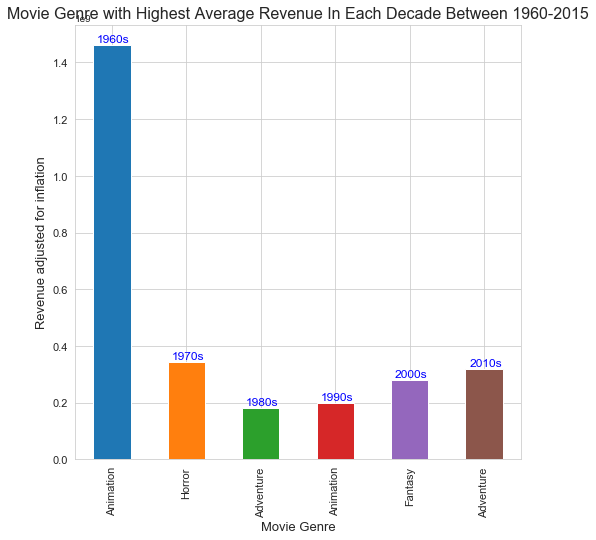

In [30]:
# Our result shall be plotted to a bar chart.
df_01_max.plot(x = 'genres', y= 'revenue_adj', kind = 'bar', fontsize =11, figsize = [8,8])
plt.title('Movie Genre with Highest Average Revenue In Each Decade Between 1960-2015', fontsize =16)
plt.xlabel('Movie Genre', fontsize =13)
plt.ylabel('Revenue adjusted for inflation', fontsize =13)
plt.legend().set_visible(False)
plt.text(-0.2, 1.470194e+09, "1960s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 1, 3.532900e+08, "1970s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 2, 1.911356e+08, "1980s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 3, 2.086986e+08, "1990s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 4, 2.897992e+08, "2000s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 5, 3.300704e+08, "2010s", color = 'blue', fontsize = 12)

- The bar chart that we have just created above displays the movie genres with highest average revenue adjusted for inflation in each decade from 1960 to 2015. For example, Animation and Horror were the ones that brought in the most money on average in the 1960s and 1970s respectively.


- Note that the first bar which shows Animation as the movie genre with highest average revenue in the 1960s is much taller than all the others. This shall be explained later in the Conclusion section.

In [31]:
# This function is very similar to the above max_revenue, but instead will return the genres with lowest average revenue in each decade
def least_revenue(a,b):
    df = a.query(b[0]).groupby('genres', as_index=False)['revenue_adj'].mean().sort_values('revenue_adj', ascending=True).head(1)
    for i in b[1:]:
        df = df.append(a.query(i).groupby('genres', as_index=False)['revenue_adj'].mean().sort_values('revenue_adj', ascending=True).head(1), ignore_index = True)
    return df

In [32]:
df_01_least = least_revenue(df_01_new, decade_list)
df_01_least

,genres,revenue_adj
0,Horror,1.100170e+08
1,Documentary,6.044288e+05
2,Documentary,5.144268e+06
3,Foreign,6.462406e+06
4,Foreign,1.495039e+07
5,Foreign,2.208502e+06


Text(4.8,2.3085e+06,'2010s')

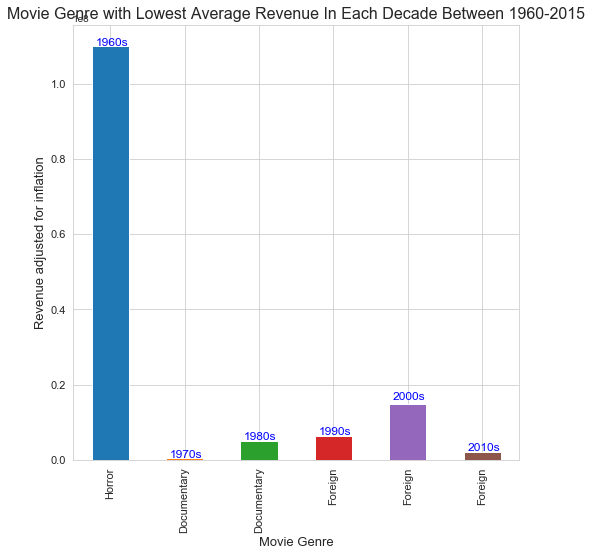

In [33]:
# plotting our results to a bar chart
df_01_least.plot(x = 'genres', y= 'revenue_adj', kind = 'bar', fontsize =11, figsize = [8,8])
plt.title('Movie Genre with Lowest Average Revenue In Each Decade Between 1960-2015', fontsize =16)
plt.xlabel('Movie Genre', fontsize =13)
plt.ylabel('Revenue adjusted for inflation', fontsize =13)
plt.legend().set_visible(False)
plt.text(-0.2, 1.100170e+08, "1960s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 1, 6.184288e+05, "1970s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 2, 5.244268e+06, "1980s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 3, 6.562406e+06, "1990s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 4, 1.595039e+07, "2000s", color = 'blue', fontsize = 12)
plt.text(-0.2 + 5, 2.308502e+06, "2010s", color = 'blue', fontsize = 12)

- This bar chart, on the contrary, shows which were the movie genres that had the lowest average revenue adjusted for inflation in each decade from 1960 to 2015. In the 1960s, it was Horror movies that received the least amount of revenue on average, while in the 2000s that position was replaced by Foreign movies.


- The peculiarity of the height of the first bar on the left will also be addressed later in the Conclusion section.

### Research Question 2 : Which production companies have the largest total revenue from 1960 to 2015 ?

In [104]:
companies_cols = ['companies_01', 'companies_02', 'companies_03', 'companies_04', 'companies_05']

In [105]:
# Each of the production companies that is separated by "|" will be relocated to a different column in the same row
df_02[companies_cols] = df_02['production_companies'].str.split("|", expand = True)
df_02.head()

,production_companies,budget_adj,revenue_adj,companies_01,companies_02,companies_03,companies_04,companies_05
0,Universal Studios|Amblin Entertainment|Legenda...,1.379999e+08,1.392446e+09,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures|Kennedy Miller Produ...,1.379999e+08,3.481613e+08,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment|Mandeville Films|Red Wago...,1.012000e+08,2.716190e+08,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm|Truenorth Productions|Bad Robot,1.839999e+08,1.902723e+09,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures|Original Film|Media Rights ...,1.747999e+08,1.385749e+09,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [106]:
# all production_companies_ columns are merged into one single column, with all values remain intact. The original production_companies column will also be removed.
def arrange_companies(a):
    for i in range(len(companies_cols)):
        if i == 0:
            df = a.drop(companies_cols[1:], axis = 1)
        else:
            df_new = a.drop(companies_cols[:i] + companies_cols[i+1:], axis = 1)
            df_new = df_new.rename(columns = {companies_cols[i]: 'companies_01'})
            df = df.append(df_new, ignore_index = True)
    df.drop('production_companies', axis =1, inplace = True)
    df.rename(columns = {'companies_01': 'production_companies'}, inplace = True)
    return df

In [107]:
df_02_new = arrange_companies(df_02)
df_02_new.head()

,budget_adj,revenue_adj,production_companies
0,1.379999e+08,1.392446e+09,Universal Studios
1,1.379999e+08,3.481613e+08,Village Roadshow Pictures
2,1.012000e+08,2.716190e+08,Summit Entertainment
3,1.839999e+08,1.902723e+09,Lucasfilm
4,1.747999e+08,1.385749e+09,Universal Pictures


Text(0,0.5,u'Total revenue adjusted for inflation')

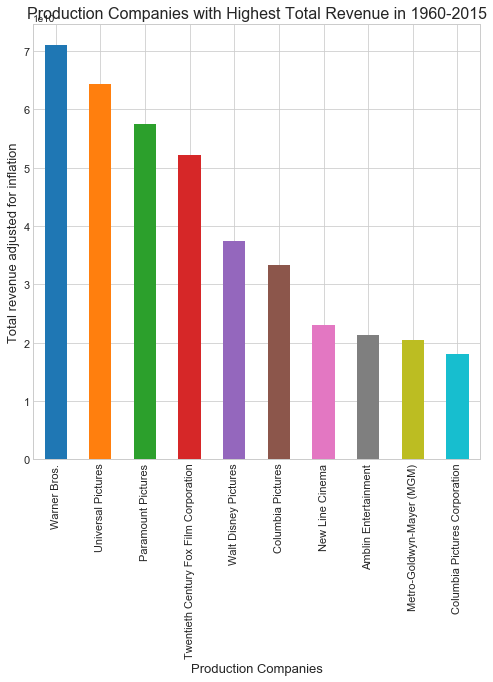

In [111]:
# Computing the total revenue for each production company and then plotting the top 10 highest to a bar chart.
df_02_new.groupby('production_companies')['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar', fontsize =11, figsize = [8,8])
plt.title('Production Companies with Highest Total Revenue in 1960-2015', fontsize =16)
plt.xlabel('Production Companies', fontsize =13)
plt.ylabel('Total revenue adjusted for inflation', fontsize =13)

- This bar chart reveals what were the production companies with highest total revenue from 1960 to 2015.


- It is evident from the above bar chart that Warner Bros is the production company that have the highest total revenue ( adjusted for inflation ) from 1960 to 2015, with Universal Pictures and Paramount Pictures occupying the second and third spot respectively. 

### Research Question 3 : Are movies becoming more expensive to make ?

- We will study the correlation between a movie's release year and its cost measured by budget adjusted for inflation.


- As mentioned previously, we will drop rows that have budget_adj value equals to 0.0 as it implies the true budget figure has not been obtained, thereby improving the accuracy of our studies.

In [24]:
df_03 = df.query('budget_adj != 0')
df_03.describe()

,release_year,budget_adj,revenue_adj
count,5170.000000,5.170000e+03,5.170000e+03
mean,2001.252805,3.688774e+07,1.021757e+08
std,11.775932,4.195701e+07,1.959055e+08
min,1960.000000,9.210911e-01,0.000000e+00
25%,1996.000000,8.102293e+06,0.000000e+00
50%,2005.000000,2.272271e+07,2.853699e+07
75%,2010.000000,5.007483e+07,1.133573e+08
max,2015.000000,4.250000e+08,2.827124e+09


Text(0,0.5,u'Budget adjusted for inflation')

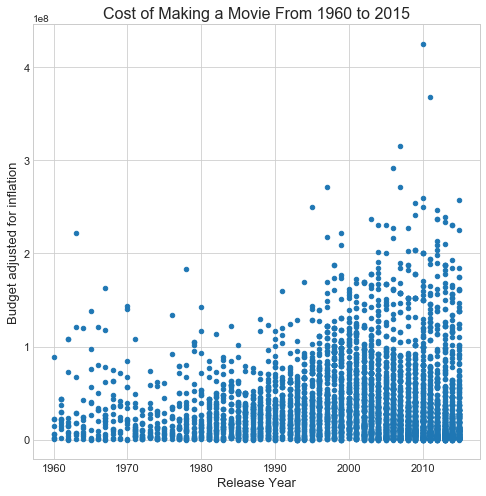

In [87]:
# plotting the correlation between release_year and budget_adj
df_03.plot(x = 'release_year', y = 'budget_adj', kind = 'scatter', fontsize =11, figsize = [8,8])
plt.title('Cost of Making a Movie From 1960 to 2015', fontsize =16)
plt.xlabel('Release Year', fontsize =13)
plt.ylabel('Budget adjusted for inflation', fontsize =13)

- This scatter plot shows the correlation between movies' release year and their budgets adjusted for inflation.


- It is very clear that there is, indeed, a positive correlation between a movie's year of release and its budget, with the cost rising almost every year even when inflation has been taken into account.

### Research Question 4 : Which are the most profitable movies being made during each decade from 1960 to 2015 ?

- In this question, we will calculate the profit each movie made by substracting its budget from its revenue ( both are adjusted for inflation ). Only movies that have valid budget_adj and revenue_adj value, which means other than 0.0 shall be considered in our analysis.

In [38]:
df_04 = df.query('budget_adj != 0').query('revenue_adj != 0') # excluding rows that have 0.0 for either revenue_adj or budget_adj
df_04.drop(['cast', 'director', 'genres', 'production_companies'], axis = 1, inplace = True) # dropping columns that we don't need
df_04['profit_adj'] = df_04['revenue_adj'] - df_04['budget_adj'] # creating profit_adj column by substracting budget_adj from revenue_adj
df_04.head()

,original_title,release_year,budget_adj,revenue_adj,profit_adj
0,Jurassic World,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,Mad Max: Fury Road,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,Insurgent,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,Star Wars: The Force Awakens,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,Furious 7,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [39]:
df_04['time_periods'] = pd.cut(df_04['release_year'], year_gap, labels=year_name) #creating time_periods column

In [40]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 6 columns):
original_title    3855 non-null object
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
profit_adj        3855 non-null float64
time_periods      3855 non-null category
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 184.7+ KB


In [41]:
# this function will return the movie with highest profit in each time period.
def max_profit(a,b):
    df = a.query(b[0]).sort_values('profit_adj',ascending=False).head(1)
    for i in b[1:]:
        df = df.append(a.query(i).sort_values('profit_adj',ascending=False).head(1), ignore_index = True)
    return df

In [42]:
df_04_new = max_profit(df_04, decade_list)
df_04_new

,original_title,release_year,budget_adj,revenue_adj,profit_adj,time_periods
0,One Hundred and One Dalmatians,1961,2.917944e+07,1.574815e+09,1.545635e+09,1960-1969
1,Star Wars,1977,3.957559e+07,2.789712e+09,2.750137e+09,1970-1979
2,E.T. the Extra-Terrestrial,1982,2.372625e+07,1.791694e+09,1.767968e+09,1980-1989
3,Titanic,1997,2.716921e+08,2.506406e+09,2.234714e+09,1990-1999
4,Avatar,2009,2.408869e+08,2.827124e+09,2.586237e+09,2000-2009
5,Star Wars: The Force Awakens,2015,1.839999e+08,1.902723e+09,1.718723e+09,2010-2015


Text(4.8,1.93872e+09,'2010s')

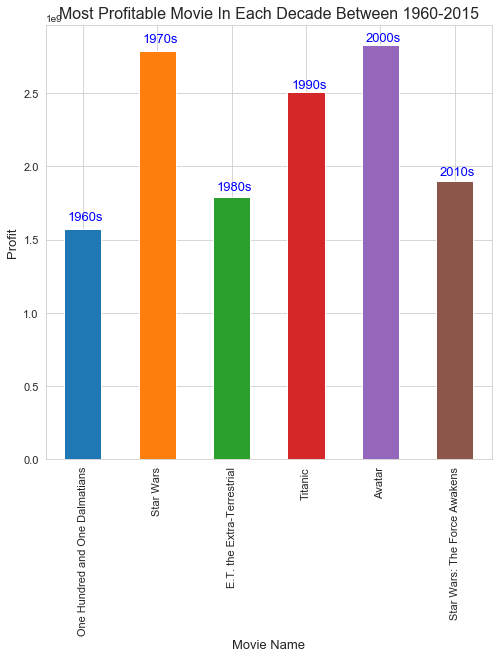

In [43]:
# plotting the results to a bar chart for easy comparison
df_04_new.plot( x = 'original_title', y = 'revenue_adj', kind = 'bar', fontsize =11, figsize = [8,8])
plt.title('Most Profitable Movie In Each Decade Between 1960-2015', fontsize =16)
plt.xlabel('Movie Name', fontsize =13)
plt.ylabel('Profit', fontsize =13)
plt.legend().set_visible(False)
plt.text(-0.2, 1.634815e+09, "1960s", color = 'blue', fontsize = 13)
plt.text(-0.2 + 1, 2.850137e+09, "1970s", color = 'blue', fontsize = 13)
plt.text(-0.2 + 2, 1.837968e+09, "1980s", color = 'blue', fontsize = 13)
plt.text(-0.2 + 3, 2.534714e+09, "1990s", color = 'blue', fontsize = 13)
plt.text(-0.2 + 4, 2.856237e+09, "2000s", color = 'blue', fontsize = 13)
plt.text(-0.2 + 5, 1.938723e+09, "2010s", color = 'blue', fontsize = 13)

- This bar chart presents the most profitable movies in each decade from 1960 to 2015. We measure a movie's profitability by substracting its budget from its revenue ( both are adjusted for inflation ).


- We can see that Star Wars and Avatar are the 2 movies that earned the most profits overall from 1960 to 2015.


- Note that these only show the most profitable movies in each decade, not necessarily the ones that have earned the most profits overall. With that being said, the most profitable among these is indeed the one with the highest profit among all the movies in the dataset.

In [62]:
# Checking the number of movies in each time periods
df_04.groupby('time_periods')['original_title'].count()

time_periods
1960-1969      71
1970-1979     133
1980-1989     395
1990-1999     755
2000-2009    1460
2010-2015    1041
Name: original_title, dtype: int64

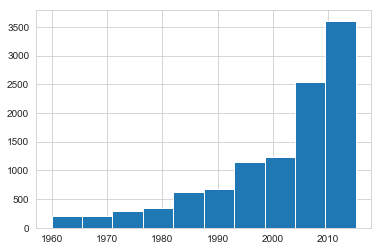

In [44]:
# checking the the distribution of release years for movies in our original dataset
df.release_year.hist()

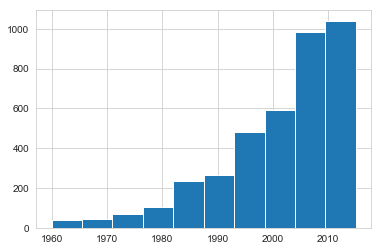

In [46]:
# checking the the distribution of release years for movies in our modified dataset
df_04.release_year.hist()

- As evidenced from the above histograms, our distribution of release years for movies are skewed to the left, which means there are many more movies made in the 2000s or 2010s that were recorded in our dataset than say, the 1960s.


- For that reason, if a movie wants to be recognized as being the most profitable in its decade of being released, it would face much more competition in the 2010s or 2000s than in the 1960s or 1970s !

### Research question 5: Who are the most successful actors / actresses measured by having the largest total revenue for the movies that they starred in ?

In [192]:
cast_list = ['cast_01','cast_02', 'cast_03', 'cast_04', 'cast_05']

In [193]:
# unpacking cast names in each row
df_05[cast_list] = df_05['cast'].str.split("|", expand = True)
df_05.head()

,cast,budget_adj,revenue_adj,cast_01,cast_02,cast_03,cast_04,cast_05
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [194]:
# all cast_ columns are merged in a single one, with the original cast column being removed
def arrange_cast(a):
    for i in range(len(cast_list)):
        if i == 0:
            df = a.drop(cast_list[1:], axis = 1)
        else: 
            df_new = a.drop(cast_list[:i] + cast_list[i+1:], axis = 1)
            df_new = df_new.rename(columns = {cast_list[i]: 'cast_01'})
            df = df.append(df_new, ignore_index = True)
    df.drop('cast', axis =1, inplace = True)
    df.rename(columns = {'cast_01': 'cast'}, inplace = True)
    return df

In [195]:
df_05_new = arrange_cast(df_05)
df_05_new.head()

,budget_adj,revenue_adj,cast
0,1.379999e+08,1.392446e+09,Chris Pratt
1,1.379999e+08,3.481613e+08,Tom Hardy
2,1.012000e+08,2.716190e+08,Shailene Woodley
3,1.839999e+08,1.902723e+09,Harrison Ford
4,1.747999e+08,1.385749e+09,Vin Diesel


Text(0,0.5,u'Total Revenue adjusted for Inflation')

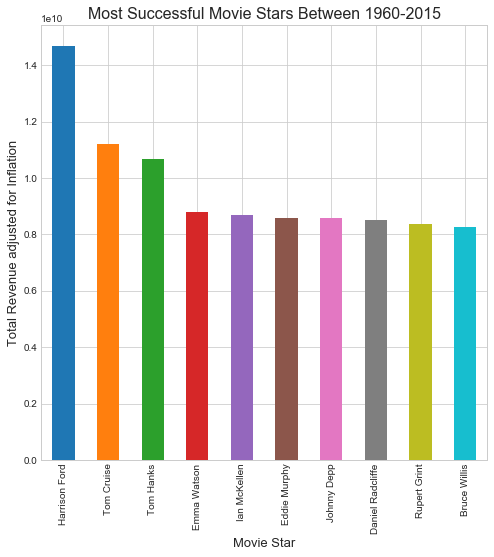

In [198]:
# Finding 10 actors / actresses with the highest total revenue for the movies that they starred in and then plotting them to a bar chart
df_05_new.groupby('cast')['revenue_adj'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = [8,8])
plt.title('Most Successful Movie Stars Between 1960-2015', fontsize =16)
plt.xlabel('Movie Star', fontsize =13)
plt.ylabel('Total Revenue adjusted for Inflation', fontsize =13)

- This bar chart shows the top 10 most successful movie stars in terms of having the largest total amount of revenue for the movies that they appeared in.


- Harrison Ford appears to be the most successful actor from 1960 to 2015 measured by our method, followed by Tom Cruise, Tom Hanks and other movie stars. All the main casts in the Harry Potter franchise, which include Emma Watson, Daniel Radcliffe and Rupert Grint also make it to our chart.

## Even More Data Exploration

- Although this is not part of the original 5 research questions, in this section we will continue to further explore our dataset by finding out the distribution of movies' revenue ( adjusted for inflation ) in each decade from 1960 to 2015.

In [47]:
# removing rows that have revenue_adj value equals to 0.0
df_06 = df.query('revenue_adj != 0')

In [50]:
# creating a time_periods column which consists of 10 year interval from 1960 to 2015, except for the last one from 2010 to 2015.
df_06['time_periods'] = pd.cut(df_06['release_year'], year_gap, labels=year_name)

C:\Users\tuanh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Revenue adjusted for Inflation')

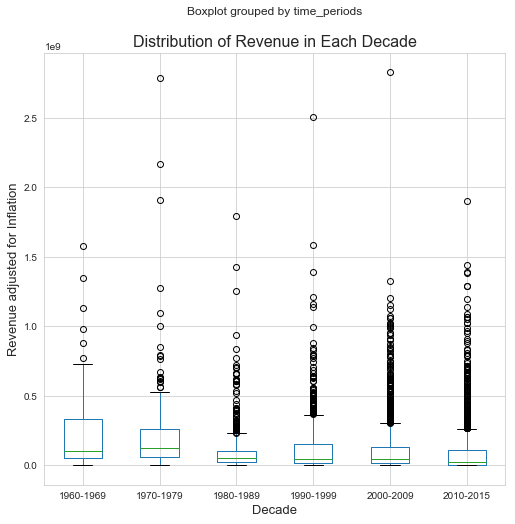

In [55]:
#creating a box plot displaying the distribution of movie's revenue adjusted for inflation in each decade
df_06.boxplot(column = "revenue_adj", by="time_periods", figsize = [8,8])
plt.title('Distribution of Revenue in Each Decade', fontsize =16)
plt.xlabel('Decade', fontsize =13)
plt.ylabel('Revenue adjusted for Inflation', fontsize =13)

- The median revenue of movies kept getting lower in 1980s, 1990s, 2000s and 2010s compared to earlier decades.


- The maximum ( not including outliers ) and upper quartile revenue values in 1960s are higher than that in 2010s.


- The number of outliers, or movies with significantly higher revenue in each decade do increase over time, although this might simply be because there are more movies made in more recent time in our dataset as pointed out in research question 4.


- Not counting outliers ( or blockbusters ), it seems the overall movies industry in 2010s do not seem to do as well as in 1960s, probably because of fiercer competition as more and more movies are made every year.

In [65]:
#checking the number of movies made in each decade
df_06.groupby('time_periods')['original_title'].count()

time_periods
1960-1969      82
1970-1979     177
1980-1989     597
1990-1999     959
2000-2009    1672
2010-2015    1363
Name: original_title, dtype: int64

In [76]:
# Checking the mean revenue of movies made in each decade, it does decrease quite significantly over time.
df_06.groupby('time_periods')['revenue_adj'].mean()

time_periods
1960-1969    2.498845e+08
1970-1979    2.369834e+08
1980-1989    9.966967e+07
1990-1999    1.183364e+08
2000-2009    1.101591e+08
2010-2015    1.016253e+08
Name: revenue_adj, dtype: float64

<a id='conclusions'></a>
## Conclusions



- The movie genres with highest average revenue in each decade are Animation in 1960s, Horror in 1970s, Adventure in 1980s, Animation in 1990s, Fantasy in 2000s and Adventures in 2010-2015. 

    The movie genres with lowest average revenue in each decade are Horror in 1960s, Documentary in 1970s and 1980s, Foreign in 1990s, 2000s and 2010-2015.

    Note that the bars for 1960s in both chart are much taller than all the other decades. In the first one, this is due to the fact that there are only 2 movies belonging to Animation genre, and one of them happens to be the most profitable one as shown in research question 4. And for the second chart, this is partly because there are no movies belonging to Documentary and Foreign genre in the 1960s, which have much lower revenue and dominate the bars for the following decades.
    
    
- Warner Bros is the production company with the largest total revenue from 1960 to 2015, followed by Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation, Walt Disney Pictures,...

    
- There is a positive correlation between a movie's release year and its budget, which means the more recent a movie is made, the more likely it is to have a larger budget.

    
- One Hundred and One Dalmatians, Star Wars, E.T. the Extra-Terrestrial, Titanic, Avatar and Star War: The Force Awakens are the movies with highest profit in the 1960s, 1970s, 1980s, 1990s, 2000s and 2010-2015 respectively.

    
- The most successful movie stars between 1960 and 2015 in terms of having the largest total revenue for the movies that they appeared in are Harrison Ford, Tom Cruise, Tom Hanks, Emma Watson, Ian McKellen, Eddie Murphy, Johnny Depp,...

## Some Limitations

- The data for the last decade only last until 2015, which means the result for this time period might not be the most accurate and up-to-date.


- In research question 1, 2 and 5, no clear explanation was given as to why we put all the unpacked data into 5 separate columns, what if there are cells that have 6 values or even more ? While no definite answer is available, if we chose the wrong number instead of 5, the line of code that help to unpack the data would not work and return an error.


- In research question 5, we measure the success of movie stars by the total revenue of all the movies that they appear in. This method favors more senior actors / actresses as they began their career much earlier and starred in more movies, thus are more likely to have higher total revenue number than younger ones.